
<a id='rob'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Robustez


<a id='index-0'></a>

## Conteúdo

- [Robustez](#Robustez)  
  - [Resumo](#Resumo) 
  - [O Modelo](#O-Modelo)  
  - [Construíndo Políticas mais Robustas](#Construíndo-Políticas-mais-Robustas)  
  - [Robustez como Resposta de um Jogo de Soma Zero para Duas Pessoas](#Robustez-como-Resposta-de-um-Jogo-de-Soma-Zero-para-Duas-Pessoas)  
  - [O Caso Estocástico](#O-Caso-Estocástico)  
  - [Implementação](#Implementação)  
  - [Aplicação](#Aplicação)  
  - [Apêndice](#Apêndice)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo


<a id='index-1'></a>
Esta aula modifica uma equação de Bellman para expressar as dúvidas de um tomador de decisão sobre a dinâmica de transição.

Suas dúvidas de especificação fazem com que o tomador de decisão deseje uma regra de decisão *robusta*.

Robusto significa insensível à especificação incorreta da dinâmica de transição.

O tomador de decisão possui um único *modelo aproximado*.

Ele chama isso de "aproximado" para reconhecer que não confia completamente nele.

Ele teme que os resultados sejam realmente determinados por outro modelo que ele não possa descrever explicitamente.

Tudo o que ele sabe é que o modelo atual de geração de dados está em algum conjunto (incontável) de modelos que envolve seu modelo aproximado.

Ele quantifica a discrepância entre seu modelo de aproximação e o modelo de geração de dados genuíno usando uma quantidade chamada *entropia*.

(Explicaremos abaixo o que significa entropia)

Ele quer uma regra de decisão que funcione bem o suficiente, independentemente de qual desses outros modelos realmente governe os resultados.

É isso que significa para sua regra de decisão ser “robusta à especificação incorreta de um modelo aproximado”.

Pode parecer pedir muito, mas $ \ldots $.

$ \ldots $ a *arma secreta* está disponível para projetar regras de decisão robustas.

A arma secreta é a teoria do controle max-min.

Um tomador de decisão maximizador de valor solicita a ajuda de um seletor de modelo minimizador de valor (imaginário) para construir *limites* sobre o valor atingido por uma regra de decisão dada em diferentes modelos da dinâmica de transição.

O tomador de decisão original usa esses limites para construir uma regra de decisão com um nível de desempenho garantido, independentemente do modelo que realmente governa os resultados.

> **Observação**
>
> Ao ler esta aula, não pense que nosso tomador de decisão é paranóico quando ele realiza uma análise de pior caso. Ao projetar uma regra que funcione bem no pior dos casos, sua intenção é construir uma regra que funcione bem em um conjunto de modelos.


<a id='rb-vec'></a>

### Séries de modelos implicam séries de valores

Nosso tomador de decisão “robusto” quer saber até que ponto uma determinada regra funcionará quando ele não *conhece* uma única lei de transição $ \ldots $.

$ \ldots $ ele deseja conhecer *conjuntos* de valores que serão atingidos por uma determinada regra de decisão $ F $ sob um *conjunto* de leis de transição.

Por fim, ele deseja criar uma regra de decisão $ F $ que modele esses *conjuntos* de valores da maneira que ele preferir.

Com isso em mente, considere o gráfico a seguir, relacionado a um problema de decisão específico a ser explicado abaixo.

![1](https://github.com/pluiz30/Julia-Hub/assets/60633407/4d8b423e-572e-46b5-baf8-0cee845e0508)
  
A figura mostra uma *correspondência de entropia de valor* para uma regra de decisão específica $ F $.

O conjunto sombreado é o gráfico da correspondência, que mapeia a entropia para um conjunto de valores associados a um conjunto de modelos que cercam o modelo aproximado do tomador de decisão.

Aqui:

- *Valor* refere-se à soma das recompensas com desconto obtidas pela aplicação da regra de decisão $ F $ quando o estado inicia em algum estado inicial fixo $ x_0 $.
- *Entropia* é um número não negativo que mede o tamanho de um conjunto de modelos em torno do modelo aproximador do tomador de decisão.
  
  - A entropia é zero quando o conjunto inclui apenas o modelo de aproximação, indicando que o tomador de decisão confia completamente no modelo de aproximação.
  - A entropia é maior e o conjunto de modelos circundantes é maior, menos o tomador de decisão confia no modelo que se aproxima.
  


A região sombreada indica que, para todos os modelos com entropia menor ou igual ao número no eixo horizontal, o valor obtido estará em algum lugar dentro do conjunto de valores indicado.

Agora vamos comparar conjuntos de valores associados a duas regras de decisão diferentes, $ F_r $ e $ F_b $.

Na próxima figura,

- O conjunto vermelho mostra a correspondência de entropia de valor para a regra de decisão $ F_r $.
- O conjunto azul mostra a correspondência de entropia de valor para a regra de decisão $ F_b $.  




![2](https://github.com/pluiz30/Julia-Hub/assets/60633407/8bf5e732-bd95-484f-9df0-ea69d1fc9bcf)
A correspondência azul é mais fina que a correspondência vermelha.

Isso transmite o sentido em que a regra de decisão $ F_b $ é *mais robusta* do que a regra de decisão $ F_r $.

- *mais robusto* significa que o conjunto de valores é menos sensível à um *aumento da especificação incorreta* medida pela entropia.


Observe que a regra menos robusta $ F_r $ promete valores mais altos para pequenas especificações incorretas (pequena entropia).

(Mas é mais frágil no sentido de ser mais sensível às perturbações do modelo que se aproxima)

Abaixo, explicaremos em detalhes como construir esses conjuntos de valores para um determinado $ F $, mas, por enquanto, $ \ldots $.

Aqui está uma dica sobre as *armas secretas* que usaremos para construir esses conjuntos:

> - Usaremos alguns problemas mínimos para construir os limites inferiores.
- Usaremos alguns problemas máximos para criar os limites superiores.  



Também descreveremos como escolher $ F $ para modelar os conjuntos de valores.

Isso envolverá a criação de um conjunto *mais fino* ao custo de um nível *mais baixo* (pelo menos para valores baixos de entropia).

### Vídeo inspirador

Se você quiser entender mais sobre a razão de um pesquisador quantitativo sério está interessado nessa abordagem, recomendamos [a aula do Prêmio Nobel Lars Peter Hansen](http://www.nobelprize.org/mediaplayer/index.php?id=1994).

### Outras referências 

Nossa discussão destas aulas são baseadas em:

- [[HS00]](https://julia.quantecon.org/../zreferences.html#hansensargent2000)  
- [[HS08]](https://julia.quantecon.org/../zreferences.html#hansensargent2008)  

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics

## O Modelo

Por simplicidade, apresentamos idéias no contexto de uma classe de problemas com leis de transição lineares e funções objetivas quadráticas.

Para nos encaixar com [nossa aula anterior sobre controle QL](https://julia.quantecon.org/lqcontrol.html), trataremos a minimização de perdas em vez da maximização de valor.

Para começar, lembre-se do [problema de horizontes infinitos QL](https://julia.quantecon.org/lqcontrol.html#lq-ih), em que um agente escolhe uma sequência de controles $ \{u_t \} $ para minimizar:


<a id='equation-rob-sih'></a>
$$
\sum_{t=0}^{\infty} \beta^t
   \left\{
       x_t' R x_t +  u_t' Q u_t
   \right\} \tag{1}
$$

sujeito à lei linear da moção,


<a id='equation-rob-lom'></a>
$$
x_{t+1} = A x_t + B u_t + C w_{t+1},
\qquad t = 0, 1, 2, \ldots \tag{2}
$$

Como antes,

- $ x_t $ é $ n \times 1 $, $ A $ é $ n \times n $;  
- $ u_t $ é $ k \times 1 $, $ B $ é $ n \times k $;  
- $ w_t $ é $ j \times 1 $, $ C $ é $ n \times j $, e  
- $ R $ é $ n \times n $ e $ Q $ é $ k \times k $.  


Aqui $ x_t $ é o estado, $ u_t $ é o controle e $ w_t $ é um vetor de choque.

Por enquanto, consideramos $ \{w_t \}: = \{w_t \} _ {t = 1} ^ {\infty} $ como determinísticos - uma única sequência fixa.

Também permitimos *incerteza no modelo* por parte do agente que resolve esse problema de otimização.

Em particular, o agente usa $ w_t = 0 $ para todos os $ t \geq 0 $ como modelo de referência, mas admite a possibilidade de que este modelo esteja errado.

Como consequência, ela também considera um conjunto de modelos alternativos expressos em termos de sequências $ \{w_t \} $ que estão "próximas" da sequência zero.

Ela busca uma política que funcione bem o suficiente para um conjunto de modelos alternativos cujos membros são identificados pelas sequências $ \{w_t \} $.

Em breve, quantificaremos a qualidade de uma especificação de modelo em termos do tamanho máximo da expressão $ \sum_ {t = 0}^ {\infty} \beta^{t + 1} w_{t + 1} 'w_{ t + 1} $.

## Construíndo Políticas mais Robustas

Se nosso agente toma $ \{ w_t \} $ como uma dada sequência determinística, então, aproveitando a intuição de aulas anteriores sobre programação dinâmica, podemos antecipar equações de Bellman, como:

$$
J_{t-1} (x)
= \min_u
\{
    x' R x + u' Q u + \beta \,
    J_t (Ax + B u + C w_t)
\}
$$

(Aqui $ J $ depende de $ t $ porque a sequência $ \{w_t \} $ não é recursiva)

Nossa ferramenta para estudar a robustez é construir uma regra que funcione bem, mesmo que ocorra uma sequência adversa $ \{w_t \} $.

Em nossa estrutura, “adverso” significa “aumento de perdas”.

Como veremos, isso acabará nos levando a construir a equação de Bellman.


<a id='equation-rb-wcb0'></a>
$$
J (x) = \min_u \max_w \{ x' R x + u' Q u + \beta \,[J (Ax + B u + C w) - \theta w'w] \} \tag{3}
$$

Observe que adicionamos o termo de penalidade $ - \theta w'w $.

Desde $ w'w = \| w \| ^ 2 $, esse termo se torna influente quando $ w $ se afasta da origem.

O parâmetro de penalidade $ \theta $ controla quanto penalizamos o agente maximizador por "prejudicar" o agente minimizador.

Ao aumentar cada vez mais $ \theta $, limitamos cada vez mais a capacidade de maximizar o agente para distorcer os resultados em relação ao modelo que se aproxima.

Portanto, um $ \theta $ maior está implicitamente associado a seqüências de distorção menores $ \{w_t \} $.

### Analisando a equação de Bellman

Então, como é $ J $ em [(3)](#equation-rb-wcb0)?

Assim como no [modelo de controle QL comum](https://julia.quantecon.org/lqcontrol.html), $ J $ assume a forma $ J (x) = x 'P x $ para alguma matriz definida positiva simétrica $ P $.

Uma de nossas principais tarefas será analisar e calcular a matriz $ P $.

As tarefas relacionadas serão estudar as regras de feedback associadas para $ u_t $ e $ w_ {t + 1} $.

Primeiro, usando [cálculo matricial](https://julia.quantecon.org/../tools_and_techniques/linear_algebra.html#la-mcalc), você poderá verificar se,

<a id='equation-rb-mp0'></a>
$$
\begin{aligned}
\max_w
&\{
    (Ax + B u + C w)' P (Ax + B u + C w) - \theta w'w
\}
\\
& \hspace{20mm} = (Ax + Bu)' \mathcal D(P) (Ax + Bu)
\end{aligned} \tag{4}
$$

onde


<a id='equation-rb-d'></a>
$$
\mathcal D(P) := P + PC (\theta I - C' P C)^{-1} C' P \tag{5}
$$

e $ I $ é uma matriz-identidade $ j \times j $. Substituindo essa expressão pelo máximo em [(3)](#equation-rb-wcb0), produzimos:


<a id='equation-rb-owb'></a>
$$
x'Px  =  \min_u    \{
    x' R x + u' Q u + \beta \,
   (Ax + Bu)' \mathcal D(P) (Ax + Bu)    \} \tag{6}
$$

Usando matemática similar, a solução para o problema da minimização será $ u  = - F x $ onde $ F := (Q + \beta B' \mathcal D (P) B)^{-1} \beta B' \mathcal D(P) A $.

Substituir esse minimizador de volta em [(6)](#equation-rb-owb) e trabalhar com a álgebra, fornece
$ x 'P x = x' \mathcal B (\mathcal D (P)) x $ para todos os $ x $ ou, equivalente,

$$
P = \mathcal B ( \mathcal D( P ))
$$

onde $ \mathcal D $ é o operador definido em [(5)](#equation-rb-d) e

$$
\mathcal B(P)
:= R - \beta^2 A' P B (Q + \beta B' P B)^{-1} B' P A + \beta A' P A
$$

O operador $ \mathcal B $ é o operador QL Bellman padrão (ou seja, não robusto) e $ P = \mathcal B (P) $ é a equação de Riccati da matriz padrão proveniente do
Equação de Bellman - veja [esta discussão](https://julia.quantecon.org/lqcontrol.html#lq-ih).

Sob algumas condições de regularidade (consulte [HS08](https://julia.quantecon.org/../zreferences.html#hansensargent2008)), o operador $ \mathcal B \circ \mathcal D $ possui um ponto fixo definido positivo único, que denotamos abaixo por $ \hat P $.

Uma política robusta, indexada por $ \theta $, é $ u = - \hat F x $ onde:


<a id='equation-rb-oc-ih'></a>
$$
\hat F
:= (Q + \beta B' \mathcal D (\hat P) B)^{-1} \beta B' \mathcal D(\hat P) A \tag{7}
$$

Nós também definimos,


<a id='equation-rb-kd'></a>
$$
\hat K
:= (\theta I - C' \hat PC)^{-1} C'  \hat P (A - B \hat F) \tag{8}
$$

A interpretação de $ \hat K $ é que $ w_ {t + 1} = \hat K x_t $ no pior caminho de $ \{x_t \} $, no sentido de que esse vetor é o maximizador de [( 4)](#equation-rb-mp0) avaliada na regra fixa $ u = - \hat F x $.

Observe que $ \hat P, \hat F, \hat K $ são todos determinados pelo
primitivas e $ \theta $.

Observe também que, se $ \theta $ for muito grande, $ \mathcal D $ será
aproximadamente igual ao mapeamento de identidade.

Portanto, quando $ \theta $ é grande, $ \hat P $ e $ \hat F $ são aproximadamente iguais aos seus valores padrão de QL.

Além disso, quando $ \theta $ é grande, $ \hat K $ é aproximadamente igual a zero.

Por outro lado, $ \theta $ menor está associado a um maior medo de erros de especificação do modelo e maior preocupação com a robustez.

## Robustez como Resposta de um Jogo de Soma Zero para Duas Pessoas

O que fizemos acima pode ser interpretado em termos de um jogo de soma zero para duas pessoas em que $ \hat F, \hat K $ são objetos de equilíbrio de Nash.

O agente 1 é nosso agente original, que procura minimizar as perdas no programa QL enquanto admite a possibilidade de erros de especificação.

O agente 2 é um jogador malévolo imaginário.

A malevolência do agente 2 ajuda o agente original a calcular limites em sua função de valor em um conjunto de modelos.

Começamos com o problema do agente 2.


<a id='rb-a2'></a>

### Problema do Agente 2

O agente 2:

1. conhece uma política fixa $ F $ especificando o comportamento do agente 1, no sentido de que $ u_t = - F x_t $ para todos os $ t $.
2. responde escolhendo uma sequência de choque $ \{w_t \} $ a partir de um conjunto de caminhos suficientemente perto da sequência de benchmark $ \{0, 0, 0, \ldots \} $


Uma maneira natural de dizer “suficientemente próximo da sequência zero” é restringir a
produto interno resumido $ \sum_ {t = 1} ^ {\infty} $ o que seria pequeno.

Entretanto, para obter uma formulação recursiva invariante no tempo, é conveniente
restringir um produto interno com desconto.


<a id='equation-rb-dec'></a>
$$
\sum_{t=1}^{\infty} \beta^t w_t' w_t \leq \eta \tag{9}
$$

Agora deixe $ F $ ser uma política fixa e $ J_F (x_0, \mathbf w) $ seja o
custo em valor presente dessa política, dada a sequência $ \mathbf w: = \{w_t \} $
e condição inicial $ x_0 \in \mathbb R ^ n $.

Substituindo $ -F x_t $ por $ u_t $ em [(1)](#equation-rob-sih), esse valor pode ser escrito como:


<a id='equation-rob-fpv'></a>
$$
J_F(x_0, \mathbf w) :=
    \sum_{t=0}^{\infty} \beta^t
    x_t' (R + F' Q F) x_t \tag{10}
$$

onde


<a id='equation-rob-lomf'></a>
$$
x_{t+1} = (A - B F) x_t + C w_{t+1} \tag{11}
$$

e a condição inicial $ x_0 $ é a especificada no lado esquerdo de [(10)](#equation-rob-fpv).

O agente 2 escolhe $ {\mathbf w} $ para maximizar a perda do agente 1 $ J_F (x_0, \mathbf w) $ sujeito a [(9)](#equation-rb-dec).

Usando uma formulação lagrangiana, podemos expressar esse problema como:

$$
\max_{\mathbf w}
 \sum_{t=0}^{\infty} \beta^t
  \left\{
    x_t' (R + F' Q F) x_t - \beta \theta (w_{t+1}' w_{t+1} - \eta)
  \right\}
$$

onde $ \{x_t \} $ satisfaz [(11)](#equação-rob-lomf) e $ \theta $ são multiplicadores de Lagrange na restrição [(9)](#equation-rb-dec).

No momento, vamos considerar $ \theta $ como fixo, permitindo que você abandone a constante $ \beta \theta \eta $ na função objetivo e, portanto, escrever o problema como:

$$
\max_{\mathbf w}
 \sum_{t=0}^{\infty} \beta^t
  \left\{
    x_t' (R + F' Q F) x_t - \beta \theta w_{t+1}' w_{t+1}
  \right\}
$$

ou, equivalentemente,


<a id='equation-rb-a2o'></a>
$$
\min_{\mathbf w}
\sum_{t=0}^{\infty} \beta^t
\left\{
    -x_t' (R + F' Q F) x_t + \beta \theta w_{t+1}' w_{t+1}
\right\} \tag{12}
$$

sujeito a [(11)](#equation-rob-lomf).

O que chama a atenção nesse problema de otimização é que, mais uma vez, é um problema de programação dinâmica QL com desconto , com $ \mathbf w = \{w_t \} $ como a sequência de controles.

A expressão para a política ideal pode ser encontrada aplicando a fórmula QL usual ([veja aqui](https://julia.quantecon.org/lqcontrol.html#lq-ih)).

Nós o denotamos por $ K (F, \theta) $, com a interpretação $ w_ {t + 1} = K (F, \theta) x_t $.

A etapa restante para o problema do agente 2 é definir $ \theta $ para impor a restrição [(9)](#equation-rb-dec), que pode ser feita escolhendo $ \theta = \theta _ {\eta} $ tal que em:


<a id='equation-rb-pdt'></a>
$$
\beta \sum_{t=0}^{\infty} \beta^t x_t' K(F, \theta_\eta)' K(F, \theta_\eta) x_t = \eta \tag{13}
$$

Aqui $ x_t $ é dado por [(11)](#equation-rob-lomf) — que nesse caso se torna $ x_{t+1} = (A - B F + CK(F, \theta)) x_t $.


<a id='rb-a1'></a>

### Usando o problema do agente 2 para construir limites nos conjuntos de valores

#### Os limites inferiores

Defina o objeto minimizado no lado direito do problema [(12)](#equation-rb-a2o) como $ R_ \theta (x_0, F) $.

Como “minimizadores minimizam”, temos:

$$
R_\theta(x_0, F) \leq \sum_{t=0}^\infty \beta^t \left\{  - x_t' (R + F' Q F) x_t \right\} + \beta \theta \sum_{t=0}^\infty \beta^t w_{t+1}' w_{t+1},
$$

onde $ x_{t+1} = (A - B F + CK(F, \theta)) x_t $ e $ x_0 $ é uma condição inicial dada.

A desigualdade nesse turno implica a desigualdade:


<a id='equation-rob-bound'></a>
$$
R_\theta(x_0, F) - \theta \ {\rm ent}
\leq \sum_{t=0}^\infty \beta^t \left\{  - x_t' (R + F' Q F) x_t \right\} \tag{14}
$$

onde

$$
{\rm ent} := \beta \sum_{t=0}^\infty \beta^t w_{t+1}' w_{t+1}
$$

O lado esquerdo da desigualdade [(14)](#equation-rob-bound) é uma linha reta com inclinação $ -\theta $.

Tecnicamente, é um “hiperplano separado”.

Em um valor específico da entropia, a linha é tangente ao limite inferior dos valores em função da entropia.

Em particular, o limite inferior no lado esquerdo de [(14)](#equation-rob-bound) é atingido quando:


<a id='equation-rb-pdt22'></a>
$$
{\rm ent} =  \beta \sum_{t=0}^{\infty} \beta^t x_t' K(F, \theta)' K(F, \theta) x_t \tag{15}
$$

Para construir o *limite inferior* no conjunto de valores associados a todas as perturbações $ {\mathbf w} $ satisfazendo a restrição de entropia [(9)](#equation-rb-dec) em um determinado nível de entropia, procedemos da seguinte forma :

> - Para um determinado $ \theta $, resolva o problema de minimização [(12)](#equation-rb-a2o).
- Calcule o minimizador $ R_ \theta (x_0, F) $ e a entropia associada usando [(15)](#equation-rb-pdt22).
- Calcule o limite inferior da função de valor $ R_ \theta (x_0, F) - \theta \ {\rm ent} $ e plote-o em relação a $ {\rm ent} $.
- Repita as três etapas anteriores para um intervalo de valores de $ \theta $ para rastrear o limite inferior.



> **Observação**
>
> Este procedimento varre um conjunto de hiperplanos de separação indexados por diferentes valores para o multiplicador Lagrange $ \theta $.

#### O limite superior

Para construir um *limite superior*, usamos um procedimento muito semelhante.

Simplesmente substituímos o problema de *minimização* [(12)](#equation-rb-a2o) pelo problema de *maximização*.


<a id='equation-rba2omax'></a>
$$
V_{\tilde \theta}(x_0, F) =  \max_{\mathbf w}
  \sum_{t=0}^{\infty} \beta^t
  \left\{
      -x_t' (R + F' Q F) x_t - \beta \tilde \theta w_{t+1}' w_{t+1}
  \right\} \tag{16}
$$

onde agora $ \tilde \theta> 0 $ penaliza a escolha de $ {\mathbf w} $ com entropia maior.

(Observe que $ \tilde \theta = - \theta $ está com problemas [(12)](#equation-rb-a2o))

Como os “maximizadores maximizam”, temos:

$$
V_{\tilde \theta}(x_0, F) \geq \sum_{t=0}^\infty \beta^t \left\{  - x_t' (R + F' Q F) x_t \right\} - \beta \tilde \theta \sum_{t=0}^\infty \beta^t w_{t+1}' w_{t+1}
$$

o que implica a desigualdade,


<a id='equation-robboundmax'></a>
$$
V_{\tilde \theta}(x_0, F) + \tilde \theta \ {\rm ent} \geq \sum_{t=0}^\infty \beta^t \left\{  - x_t' (R + F' Q F) x_t \right\} \tag{17}
$$

onde

$$
{\rm ent} \equiv \beta \sum_{t=0}^\infty \beta^t w_{t+1}' w_{t+1}
$$

O lado esquerdo da desigualdade [(17)](#equation-robboundmax) é uma linha reta com a inclinação $ \tilde \theta $.

O limite superior no lado esquerdo de [(17)](#equation-robboundmax) é atingido quando:


<a id='equation-rbpdt223'></a>
$$
{\rm ent} =  \beta \sum_{t=0}^{\infty} \beta^t x_t' K(F, \tilde \theta)' K(F, \tilde \theta) x_t \tag{18}
$$

Para construir o *limite superior* no conjunto de valores associados a todas as perturbações $ {\mathbf w} $ com uma dada entropia, procedemos da mesma maneira que fizemos no limite inferior.

> - Para um determinado $ \tilde \theta $, resolva o problema de maximização [(16)](#equation-rba2omax).
- Calcule o maximizador $ V _ {\tilde \theta} (x_0, F) $ e a entropia associada usando [(18)](#equation-rbpdt223).
- Calcule o limite superior da função de valor $ V _ {\tilde \theta} (x_0, F) + \tilde \theta \ {\rm ent} $ e plote-o contra $ {\rm ent} $.
- Repita as três etapas anteriores para um intervalo de valores de $ \tilde \theta $ para rastrear o limite superior.  

#### Remodelando o conjunto de valores

Agora, no interesse de *remodelar* esses conjuntos de valores escolhendo $ F $, passamos ao problema do agente 1.

### Problema do agente 1

Agora vamos para o problema do agente 1, dado por:


<a id='equation-rob-sihk'></a>
$$
\min_{\{u_t\}}
    \sum_{t=0}^{\infty} \beta^t
    \left\{
        x_t' R x_t + u_t' Q u_t - \beta \theta w_{t+1}' w_{t+1}
    \right\} \tag{19}
$$

onde  $ \{ w_{t+1} \} $ satisfaz $ w_{t+1} = K x_t $.

Em outras palavras, o agente 1 minimiza:


<a id='equation-rob-sihk2'></a>
$$
\sum_{t=0}^{\infty} \beta^t
    \left\{
        x_t' (R - \beta \theta K' K ) x_t + u_t' Q u_t
    \right\} \tag{20}
$$

sujeito à


<a id='equation-rob-lomk'></a>
$$
x_{t+1} = (A + C K) x_t + B u_t \tag{21}
$$

Mais uma vez, a expressão para a política ideal pode ser encontrada [aqui](https://julia.quantecon.org/lqcontrol.html#lq-ih) - denotamos por $ \tilde F $.


<a id='rb-eq'></a>

### Equilíbrio de Nash

Claramente, o $ \tilde F $ que obtivemos depende de $ K $, o que, no problema do agente 2, dependia de uma política inicial de $ F $.

Mantendo todos os outros parâmetros fixos, podemos representar esse relacionamento como um mapeamento $ \phi $, em que:

$$
\tilde F = \Phi(K(F, \theta))
$$

O mapa $ F \mapsto \Phi (K (F, \theta)) $ corresponde a uma situação em que:

1. O agente 1 usa uma política inicial arbitrária $ F $.
2. O agente 2 responde melhor ao agente 1 escolhendo $ K (F, \theta) $.
3. O agente 1 responde melhor ao agente 2 escolhendo $ \tilde F = \Phi (K (F, \theta)) $.


Como você já deve ter adivinhado, a política robusta $ \hat F $ definida em [(7)](#equation-rb-oc-ih) é um ponto fixo do mapeamento $ \Phi $.

Em particular, para qualquer $ \theta $,

1. $ K (\hat F, \theta) = \hat K $, em que $ \hat K $ é o dado em [(8)](#equation-rb-kd)
2. $ \Phi (\hat K) = \hat F $


Um esboço da prova é apresentado no [apêndice](#rb-apêndice).

## O Caso Estocástico

Agora, voltamos ao caso estocástico, em que a sequência $ \{w_t \} $ é tratada como uma sequência iid de vetores aleatórios.

Nesse cenário, supomos que nosso agente não tenha certeza sobre a *distribuição de probabilidade condicional* de $ w_{t + 1} $.

O agente usa a distribuição normal padrão $ N (0, I) $ como distribuição condicional da linha de base, enquanto admite a possibilidade de que outras distribuições "próximas" prevaleçam.

Essas distribuições condicionais alternativas de $ w_{t + 1} $ podem depender não linearmente do histórico $ x_s, s \leq t $.

Para implementar essa idéia, precisamos de uma noção do que isso significa para uma distribuição
estar perto de outro.

Aqui adotamos uma medida muito útil de proximidade para distribuições conhecidas como *entropia relativa* ou [divergência Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

Para densidades $ p, q $, a divergência Kullback-Leibler de $ q $ de $ p $ é definida como:

$$
D_{KL} (p, q) := \int \ln \left[ \frac{p(x)}{q(x)} \right] p(x) \, dx
$$

Usando essa notação, substituímos [(3)](#equation-rb-wcb0) pelo análogo estocástico.


<a id='equation-rb-wcb1'></a>
$$
J (x) =
\min_u
\max_{\psi \in \mathcal P}
\left\{
    x' R x + u' Q u + \beta \,
    \left[
    \int J (Ax + B u + C w) \, \psi(dw) - \theta D_{KL}(\psi, \phi)
    \right]
\right\} \tag{22}
$$

Aqui $ \mathcal P $ representa o conjunto de todas as densidades em $ \mathbb R^n $ e $ \phi $ é a distribuição de referência $ N (0, I) $.

A distribuição $ \phi $ é escolhida como a distribuição condicional menos desejável em termos de resultados do próximo período, levando em consideração o termo de penalidade $ \theta D_ {KL} (\psi, \phi) $.

Esse termo de penalidade desempenha um papel análogo ao da penalidade determinística $ \theta w'w $ em [(3)](#equation-rb-wcb0), pois desencoraja grandes desvios do benchmark.

### Resolvendo o modelo

O problema de maximização em [(22)](#equation-rb-wcb1) parece altamente não trivial - afinal, estamos maximizando um espaço dimensional infinito que consiste em todo o conjunto de densidades.

No entanto, verifica-se que a solução é tratável e, de fato, também se enquadra na classe de distribuições normais.

Primeiro, observamos que $ J $ tem a forma $ J (x) = x 'P x + d $ para alguma matriz definida positiva $ P $ e número real constante $ d $.

Além disso, acontece que se $ (I - \theta ^ {- 1} C 'P C) ^ {- 1} $ é não singular, então:


<a id='equation-rb-mls'></a>
$$
\begin{aligned}
\max_{\psi \in \mathcal P}
&\left\{
    \int (Ax + B u + C w)' P (Ax + B u + C w) \, \psi(dw) - \theta D_{KL}(\psi, \phi)
\right\}
\\
& \hspace{20mm} = (Ax + Bu)' \mathcal D (P) (Ax + Bu) + \kappa(\theta, P)
\end{aligned} \tag{23}
$$

onde

$$
\kappa(\theta, P) := \theta \ln [ \det(I - \theta^{-1} C' P C)^{-1} ]
$$

e o maximizador é a distribuição gaussiana:


<a id='equation-rb-md'></a>
$$
\psi = N
\left(
    (\theta I -  C' P C)^{-1} C' P (Ax + Bu), (I - \theta^{-1} C' P C)^{-1}
\right) \tag{24}
$$

Substituíndo a equação pelo máximo na equação de Bellman [(22)](#equation-rb-wcb1) e usando $ J(x) = x'Px + d $, temos,


<a id='equation-rb-wcb2'></a>
$$
x' P x + d =
\min_u
\left\{
    x' R x + u' Q u + \beta \,
    (Ax + Bu)' \mathcal D (P) (Ax + Bu) + \beta \, [d + \kappa(\theta, P)]
\right\} \tag{25}
$$

Como os termos constantes não afetam os minimizadores, a solução é a mesma que [(6)](#equation-rb-owb), levando a:

$$
x' P x + d
= x' \mathcal B( \mathcal D(P)) x + \beta \, [d + \kappa(\theta, P)]
$$

Para resolver essa equação de Bellman, consideramos $ \hat P $ como o ponto fixo definido positivo de $ \mathcal B \circ \mathcal D $.

Além disso, consideramos $ \hat d $ como o número real que resolve $ d = \beta \, [d + \kappa (\theta, P)] $, que é:


<a id='equation-rb-hatd'></a>
$$
\hat d := \frac{\beta}{1 - \beta} \kappa(\theta, P) \tag{26}
$$

A política robusta neste caso estocástico é o minimizador em [(25)](#equation-rb-wcb2), que é mais uma vez $ u = - \hat F x $ para $ \hat F $ dados por [(7)](#equation-rb-oc-ih) .

Substituindo a política robusta em [(24)](#equation-rb-md), obtemos o pior choque possível para a distribuição:

$$
w_{t+1} \sim
N( \hat K x_t, (I - \theta^{-1} C' \hat PC)^{-1} )
$$

onde $ \hat K $ é dado por [(8)](#equation-rb-kd).

Observe que a média da distribuição de choque do pior caso é igual ao mesmo pior caso $ w_{t + 1} $ da configuração determinística anterior.


<a id='rb-coq'></a>

### Computando outras quantidades

Antes de começarmos a implementação, descrevemos brevemente como calcular várias outras quantidades de interesse.

##### O pior caso de uma política

Uma coisa que estaremos interessados em fazer é manter uma política fixa e
computando a perda com desconto associada a essa política.

Então, deixe $ F $ ser uma determinada política e $ J_F (x) $ seja a perda associada que, por analogia com [(22)](#equation-rb-wcb1), satisfaz:

$$
J_F(x)
=
\max_{\psi \in \mathcal P}
\left\{
    x' (R + F'QF) x + \beta \,
    \left[
    \int J_F ( (A - BF)x + C w) \, \psi(dw) - \theta D_{KL}(\psi, \phi)
    \right]
\right\}
$$

Escrevendo $ J_F (x) = x'P_Fx + d_F $ e aplicando o mesmo argumento usado para
derivar [(23)](#equation-rb-mls) obtemos: 

$$
x' P_F x + d_F
=
x' (R + F'QF) x + \beta \,
\left[
 x' (A - BF)' \mathcal D(P_F) (A - BF) x + d_F + \kappa(\theta, P_F)
\right]
$$

Para resolver isso, nós tomamos $ P_F $ como sendo o ponto fixo

$$
P_F = R + F'QF + \beta (A - BF)' \mathcal D(P_F) (A - BF)
$$

e


<a id='equation-rb-hatd2'></a>
$$
d_F
:= \frac{\beta}{1 - \beta} \kappa(\theta, P_F)
= \frac{\beta}{1 - \beta}
 \theta \ln [ \det(I - \theta^{-1} C' P_F C)^{-1} ] \tag{27}
$$

Se você pular para o [apêndice](#rb-appendix), poderá verificar se $ -P_F $ é a solução para a equação de Bellman em problema do agente 2 [discutido acima](#rb-a2) - usamos isso em nossos cálculos.

## Implementação

O pacote [QuantEcon.jl](http://quantecon.org/quantecon-jl) provê um tipo chamado `RBLQ` para a implementação de um controle QL ótimo.

O código pode ser encontrado [no GitHub](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/robustlq.jl).

Aqui está uma breve descrição dos métodos do tipo:

- `d_operator ()` e `b_operator ()` implementam $ \mathcal D $ e $ \mathcal B $, respectivamente
- `robust_rule ()` e `robust_rule_simple ()` resolvem para o triplo $ \hat F, \hat K, \hat P $, conforme descrito nas equações [(7)](#equation-rb-oc-ih) - [(8)](#equation-rb-kd) e a discussão envolvente.
  
   - `robust_rule ()` é mais eficiente.
   - `robust_rule_simple ()` é mais transparente e mais fácil de seguir.
  
- `K_to_F ()` e `F_to_K ()` resolvem os problemas de decisão do [agente 1](#rb-a1) e [agente 2](#rb-a2), respectivamente;
- `compute_deterministic_entropy ()` calcula o lado esquerdo de [(13)](#equation-rb-pdt)
- `Evalu_F ()` calcula a perda e entropia associada a uma dada política - veja [esta discussão](#rb-coq).  

## Aplicação

Vamos considerar um monopolista semelhante a [este](https://julia.quantecon.org/lqcontrol.html#lqc-mwac), mas agora enfrentando incerteza no modelo.

A função de demanda inversa é $ p_t = a_0 - a_1 y_t + d_t $

onde

$$
d_{t+1} = \rho d_t + \sigma_d w_{t+1},
\quad \{w_t\} \stackrel{\textrm{iid}}{\sim} N(0,1)
$$

e todos os parâmetros são estritamente positivos.

A função de retorno para o monopolista é:

$$
r_t =  p_t y_t - \gamma \frac{(y_{t+1} - y_t)^2}{2} - c y_t
$$

Seu objetivo é maximizar os lucros esperados com desconto ou, equivalentemente, minimizar $ \mathbb E \sum_ {t = 0} ^ \infty \beta ^ t (- r_t) $.

Para formar um problema de regulador linear, assumimos o estado e o controle como:

$$
x_t
= \begin{bmatrix}
      1 \\ y_t \\ d_t
  \end{bmatrix}
  \quad \text{e} \quad
  u_t = y_{t+1} - y_t
$$

Configurando $ b := (a_0 - c) / 2 $ nós definimos: 

$$
R
= -
\begin{bmatrix}
   0 &  b & 0 \\
   b & -a_1 & 1/2 \\
   0 & 1/2 & 0
\end{bmatrix}
\quad \text{and} \quad
Q = \gamma / 2
$$

Para as matrizes de transição, nós montamos:

$$
A
= \begin{bmatrix}
   1 & 0 & 0 \\
   0 & 1 & 0 \\
   0 & 0 & \rho
  \end{bmatrix},
\qquad
B
= \begin{bmatrix}
   0 \\
   1 \\
   0
  \end{bmatrix},
\qquad
C
= \begin{bmatrix}
   0 \\
   0 \\
   \sigma_d
  \end{bmatrix}
$$

Nosso objetivo é calcular as correspondências valor-entropia [mostradas acima](#rb-vec).

Os parâmetros são:

$$
a_0 = 100, a_1 = 0.5, \rho = 0.9, \sigma_d = 0.05, \beta = 0.95, c = 2, \gamma = 50.0
$$

A distribuição normal padrão para $ w_t $ é entendida como a linha de base do agente, com incerteza parametrizada por $ \theta $.

Calculamos as correspondências de entropia de valor para duas políticas.

1. Não há preocupação com a política de robustez $ F_0 $, que é o QL minimizador de perdas.
2. Uma preocupação "moderada" pela política de robustez $ F_b $, com $ \theta = 0,02 $.


O código para produzir o gráfico mostrado acima, com azul para a política robusta, é o seguinte:

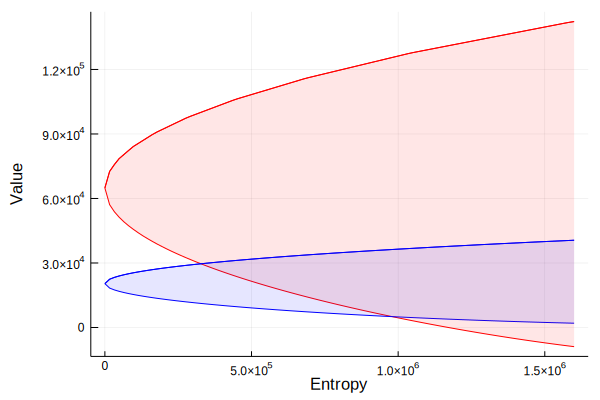

In [3]:
using QuantEcon, Plots, LinearAlgebra, Interpolations

# parâmetros do modelo
a_0 = 100
a_1 = 0.5
ρ = 0.9
σ_d = 0.05
β = 0.95
c = 2
γ = 50.0
θ = 0.002
ac = (a_0 - c) / 2.0

# Definir as matrizes QL
R = [ 0   ac    0;
    ac -a_1  0.5;
    0.  0.5    0]
R = -R  # para a minimização
Q = Matrix([γ / 2.0]')
A = [1. 0. 0.;
    0. 1. 0.;
    0. 0.  ρ]
B = [0. 1. 0.]'
C = [0. 0. σ_d]'

## Funções

function evaluate_policy(θ, F)
    rlq = RBLQ(Q, R, A, B, C, β, θ)
    K_F, P_F, d_F, O_F, o_F = evaluate_F(rlq, F)
    x0 = [1.0 0.0 0.0]'
    value = - x0' * P_F * x0 .- d_F
    entropy = x0' * O_F * x0 .+ o_F
    return value[1], entropy[1]    # escalares de retorno
end

function value_and_entropy(emax, F, bw, grid_size = 1000)
    if lowercase(bw) == "worst"
        θs = 1 ./ range(1e-8,  1000, length = grid_size)
    else
        θs = -1 ./ range(1e-8,  1000, length = grid_size)
    end

    data = zeros(grid_size, 2)

    for (i, θ) in enumerate(θs)
        data[i, :] = collect(evaluate_policy(θ, F))
        if data[i, 2] ≥ emax      # parar nesse nível de entropia
            data = data[1:i, :]
            break
        end
    end
    return data
end

## Principal

# computar a regra ótima
optimal_lq = QuantEcon.LQ(Q, R, A, B, C, zero(B'A), bet=β)
Po, Fo, Do = stationary_values(optimal_lq)

# computar a regra robusta para o nosso θ
baseline_robust = RBLQ(Q, R, A, B, C, β, θ)
Fb, Kb, Pb = robust_rule(baseline_robust)

# Verifique a definição positiva da matriz de covariância do pior caso para
# garantir que θ exceda o ponto de avaria
test_matrix = I - (C' * Pb * C ./ θ)[1]
eigenvals, eigenvecs = eigen(test_matrix)
@assert all(x -> x ≥ 0, eigenvals)

emax = 1.6e6

# computar valores e entropias
optimal_best_case = value_and_entropy(emax, Fo, "best")
robust_best_case = value_and_entropy(emax, Fb, "best")
optimal_worst_case = value_and_entropy(emax, Fo, "worst")
robust_worst_case = value_and_entropy(emax, Fb, "worst")

# revertemos a ordem do "pior caso", então os valores são ascendentes
data_pairs = ((optimal_best_case, optimal_worst_case),
              (robust_best_case, robust_worst_case))

egrid = range(0,  emax, length = 100)
egrid_data = []
for data_pair in data_pairs
    for data in data_pair
        x, y = data[:, 2], data[:, 1]
        curve = LinearInterpolation(x, y, extrapolation_bc = Line())
        push!(egrid_data, curve.(egrid))
    end
end
plot(egrid, egrid_data, color=[:red :red :blue :blue])
plot!(egrid, egrid_data[1], fillrange=egrid_data[2],
    fillcolor=:red, fillalpha=0.1, color=:red, legend=:none)
plot!(egrid, egrid_data[3], fillrange=egrid_data[4],
    fillcolor=:blue, fillalpha=0.1, color=:blue, legend=:none)
plot!(xlabel="Entropy", ylabel="Value")

Aqui está outra figura, com $ \theta = 0.002 $ ao invés de $ 0.02 $

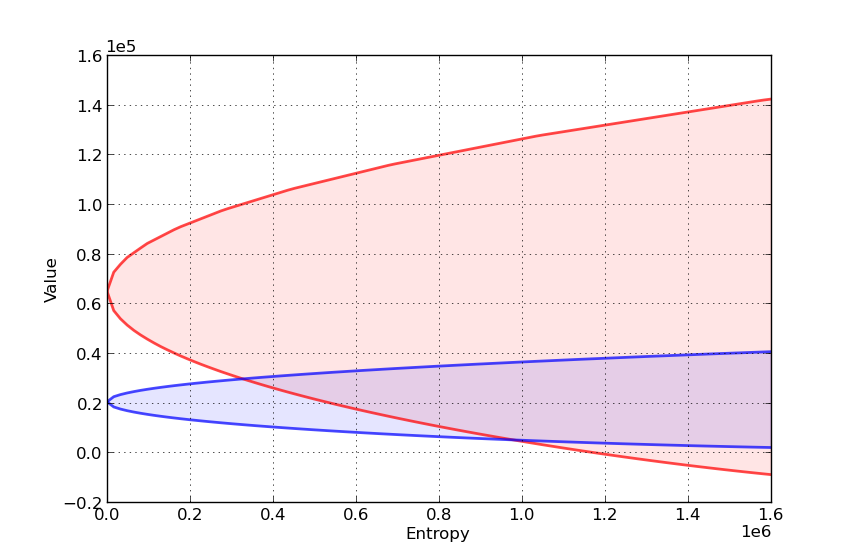

  
Você pode explicar a forma diferente da correspondência de entropia de valor para a política robusta?


<a id='rb-appendix'></a>

## Apêndice

Esboçamos a prova apenas da primeira reivindicação nesta [seção](#rb-eq),
ou seja, para qualquer $ \theta $, $ K (\hat F, \theta) = \hat K $,
onde $ \hat K $ é dado em [(8)](#equation-rb-kd).

Este é o conteúdo do próximo lema.

**Lema.** Se $ \hat P $ é o ponto fixo do mapa $ \mathcal B \circ \mathcal D $ e $ \hat F $ é a política robusta conforme indicado em [(7)](#equation-rb-oc-ih), então


<a id='equation-rb-kft'></a>
$$
K(\hat F, \theta) = (\theta I - C'\hat P C)^{-1} C' \hat P  (A - B \hat F) \tag{28}
$$

*Prova:* Como primeiro passo, observe que quando $ F = \hat F $, a equação de Bellman associada com o problema QL [(11)](#equation-rob-lomf) – [(12)](#equation-rb-a2o) é


<a id='equation-rb-a2be'></a>
$$
\tilde P = -R - \hat F' Q \hat F -
\beta^2 (A - B \hat F)' \tilde P C
(\beta \theta I + \beta C' \tilde P C)^{-1} C' \tilde P (A - B \hat F) +
\beta (A - B \hat F)' \tilde P (A - B \hat F) \tag{29}
$$

(reveja [essa discussão](https://julia.quantecon.org/lqcontrol.html#lq-ih) caso você não saiba de onde vem [(29)](#equation-rb-a2be)) e a política ótima é dada por:

$$
w_{t+1} = - \beta (\beta \theta I + \beta C' \tilde P C)^{-1}
C' \tilde P (A - B \hat F) x_t
$$

Suponha por um momento que $ - \hat P $ resolva a equação de Bellman [(29)](#equation-rb-a2be).

Nesse caso, a política se torna:

$$
w_{t+1} = (\theta I - C' \hat P C)^{-1} C' \hat P (A - B \hat F) x_t
$$

que é exatamente a afirmação em [(28)](#equation-rb-kft).

Portanto, resta apenas mostrar que $ - \hat P $ resolve [(29)](#equation-rb-a2be),
ou, em outras palavras,

$$
\hat  P
 =
 R + \hat F' Q \hat F
 + \beta (A - B \hat F)' \hat P C
   (\theta I - C' \hat P C)^{-1} C' \hat P (A - B \hat F)
   + \beta (A - B \hat F)' \hat P (A - B \hat F)
$$

Usando a definição de $ \mathcal D $, nós podemos reescrever o lado direito da equação mais simplificadamente como:

$$
R + \hat F' Q \hat F
+ \beta (A - B \hat F)' \mathcal D(\hat P) (A - B \hat F)
$$

Embora envolva uma quantidade substancial de álgebra, pode-se mostrar que o
este último é apenas $ \hat P $.

(Dica: use o fato de que $ \hat P = \mathcal B (\mathcal D (\hat P)) $)